<a href="https://colab.research.google.com/github/3umin/DL4AI_Class/blob/main/week5/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [2]:
train_images[0].shape

(784,)

In [3]:
train_images_with_noise_channels[0].shape

(1568,)

In [4]:
train_images_with_zeros_channels[0].shape

(1568,)

28 x 28 (784)개의 뉴런으로 구성되어 있는 원본 데이터에 랜덤 노이즈 784개와 0으로 된 값 784개를 추가

**Training the same model on MNIST data with noise channels or all-zero channels**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model_1 = get_model()
history_noise = model_1.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model_2 = get_model()
history_zeros = model_2.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model_3 = get_model()
history_original = model_3.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 5ms/step - loss: 0.6119 - accuracy: 0.8107 - val_loss: 0.2782 - val_accuracy: 0.9166
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2640 - accuracy: 0.9195 - val_loss: 0.2109 - val_accuracy: 0.9362
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1740 - accuracy: 0.9461 - val_loss: 0.1534 - val_accuracy: 0.9542
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1259 - accuracy: 0.9611 - val_loss: 0.1634 - val_accuracy: 0.9513
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0912 - accuracy: 0.9720 - val_loss: 0.1640 - val_accuracy: 0.9531
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0692 - accuracy: 0.9790 - val_loss: 0.1300 - val_accuracy: 0.9622
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0514 - accuracy: 0.9836 - val_loss: 0.1396 - val_accuracy: 0.9608
Epoch 

**Plotting a validation accuracy comparison**

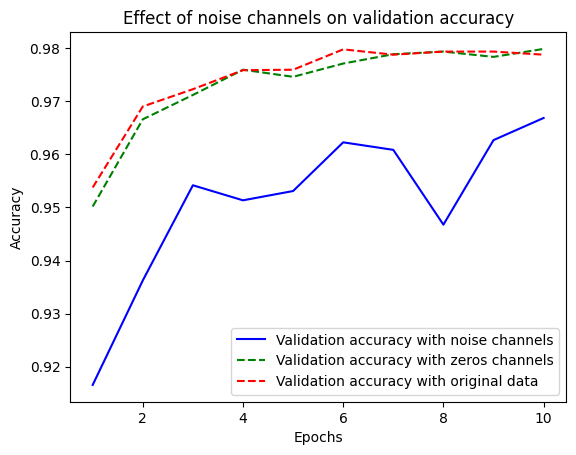

In [6]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_origin = history_original.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "g--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_origin, "r--",
         label="Validation accuracy with original data")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 2.3168 - accuracy: 0.1029 - val_loss: 2.3052 - val_accuracy: 0.1034
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2988 - accuracy: 0.1169 - val_loss: 2.3113 - val_accuracy: 0.1002
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2909 - accuracy: 0.1254 - val_loss: 2.3156 - val_accuracy: 0.1042
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2801 - accuracy: 0.1367 - val_loss: 2.3204 - val_accuracy: 0.1058
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2645 - accuracy: 0.1513 - val_loss: 2.3282 - val_accuracy: 0.1023
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2456 - accuracy: 0.1641 - val_loss: 2.3441 - val_accuracy: 0.1029
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2227 - accuracy: 0.1795 - val_loss: 2.3556 - val_accuracy: 0.1088

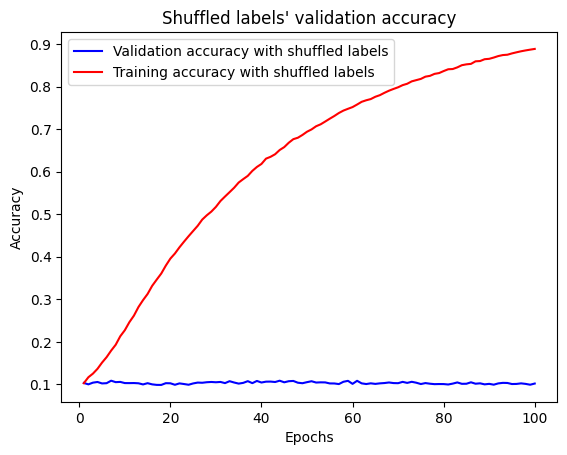

In [8]:
import matplotlib.pyplot as plt
epochs = range(1, 101)
plt.plot(epochs, model.history.history['val_accuracy'], "b-",
         label="Validation accuracy with shuffled labels")
plt.plot(epochs, model.history.history['accuracy'], "r-",
         label="Training accuracy with shuffled labels")
plt.title("Shuffled labels' validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [9]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_highlr = model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 688.8109 - accuracy: 0.3196 - val_loss: 2.2594 - val_accuracy: 0.1898
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.2854 - accuracy: 0.1847 - val_loss: 2.1876 - val_accuracy: 0.1741
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7086 - accuracy: 0.1829 - val_loss: 2.1451 - val_accuracy: 0.1972
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6455 - accuracy: 0.1903 - val_loss: 2.2143 - val_accuracy: 0.1956
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 2.5437 - accuracy: 0.2212 - val_loss: 2.2517 - val_accuracy: 0.2879
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2706 - accuracy: 0.2281 - val_loss: 2.1303 - val_accuracy: 0.2262
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4067 - accuracy: 0.2304 - val_loss: 2.1038 - val_accuracy: 0.2331
Epoc

In [39]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-4),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_lowlr = model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.7358 - accuracy: 0.8331 - val_loss: 0.3430 - val_accuracy: 0.9115
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3197 - accuracy: 0.9135 - val_loss: 0.2691 - val_accuracy: 0.9271
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2612 - accuracy: 0.9274 - val_loss: 0.2324 - val_accuracy: 0.9387
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2262 - accuracy: 0.9378 - val_loss: 0.2078 - val_accuracy: 0.9444
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2010 - accuracy: 0.9437 - val_loss: 0.1890 - val_accuracy: 0.9500
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1813 - accuracy: 0.9498 - val_loss: 0.1766 - val_accuracy: 0.9527
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1650 - accuracy: 0.9543 - val_loss: 0.1630 - val_accuracy: 0.9553
Epoch 

**The same model with a more appropriate learning rate**

In [32]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_lowlr = model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3655 - accuracy: 0.9099 - val_loss: 0.1854 - val_accuracy: 0.9469
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1276 - accuracy: 0.9645 - val_loss: 0.1191 - val_accuracy: 0.9663
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0969 - accuracy: 0.9743 - val_loss: 0.1235 - val_accuracy: 0.9706
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0813 - accuracy: 0.9792 - val_loss: 0.1953 - val_accuracy: 0.9626
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0687 - accuracy: 0.9821 - val_loss: 0.1712 - val_accuracy: 0.9697
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0585 - accuracy: 0.9857 - val_loss: 0.1885 - val_accuracy: 0.9711
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0525 - accuracy: 0.9872 - val_loss: 0.2014 - val_accuracy: 0.9703
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [40]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6657 - accuracy: 0.8353 - val_loss: 0.3613 - val_accuracy: 0.9014
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3533 - accuracy: 0.9030 - val_loss: 0.3141 - val_accuracy: 0.9127
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3181 - accuracy: 0.9118 - val_loss: 0.2917 - val_accuracy: 0.9184
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3017 - accuracy: 0.9161 - val_loss: 0.2844 - val_accuracy: 0.9218
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2922 - accuracy: 0.9183 - val_loss: 0.2804 - val_accuracy: 0.9208
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2858 - accuracy: 0.9202 - val_loss: 0.2758 - val_accuracy: 0.9249
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2811 - accuracy: 0.9215 - val_loss: 0.2710 - val_accuracy: 0.9252
Epoch 

In [41]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer='rmsprop',
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_origin = model.fit(train_images, train_labels,
          epochs=20,
          batch_size=128,
          validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2947 - accuracy: 0.9147 - val_loss: 0.1600 - val_accuracy: 0.9545
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1236 - accuracy: 0.9642 - val_loss: 0.1087 - val_accuracy: 0.9672
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0811 - accuracy: 0.9763 - val_loss: 0.0883 - val_accuracy: 0.9726
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0584 - accuracy: 0.9828 - val_loss: 0.0826 - val_accuracy: 0.9753
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0438 - accuracy: 0.9869 - val_loss: 0.0815 - val_accuracy: 0.9770
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0325 - accuracy: 0.9906 - val_loss: 0.0761 - val_accuracy: 0.9764
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0243 - accuracy: 0.9931 - val_loss: 0.0716 - val_accuracy: 0.9796
Epoch 

In [42]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.3828 - accuracy: 0.8890 - val_loss: 0.1850 - val_accuracy: 0.9470
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1692 - accuracy: 0.9498 - val_loss: 0.1472 - val_accuracy: 0.9580
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1194 - accuracy: 0.9640 - val_loss: 0.1288 - val_accuracy: 0.9640
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0920 - accuracy: 0.9715 - val_loss: 0.1133 - val_accuracy: 0.9658
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0734 - accuracy: 0.9774 - val_loss: 0.0986 - val_accuracy: 0.9718
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0613 - accuracy: 0.9809 - val_loss: 0.0895 - val_accuracy: 0.9747
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0499 - accuracy: 0.9847 - val_loss: 0.0964 - val_accuracy: 0.9728
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.5447 - accuracy: 0.7727 - val_loss: 0.4364 - val_accuracy: 0.8197
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3316 - accuracy: 0.8911 - val_loss: 0.3635 - val_accuracy: 0.8492
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2481 - accuracy: 0.9145 - val_loss: 0.3213 - val_accuracy: 0.8663
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2006 - accuracy: 0.9305 - val_loss: 0.2803 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1655 - accuracy: 0.9460 - val_loss: 0.2795 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1449 - accuracy: 0.9527 - val_loss: 0.2844 - val_accuracy: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1244 - accuracy: 0.9591 - val_loss: 0.3013 - val_accuracy: 0.8839
Epoch 8/20
30

**Version of the model with lower capacity**

In [45]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5430 - accuracy: 0.7877 - val_loss: 0.4625 - val_accuracy: 0.8138
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3736 - accuracy: 0.8850 - val_loss: 0.3568 - val_accuracy: 0.8754
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2869 - accuracy: 0.9113 - val_loss: 0.3241 - val_accuracy: 0.8824
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2319 - accuracy: 0.9245 - val_loss: 0.2883 - val_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1918 - accuracy: 0.9383 - val_loss: 0.2793 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1626 - accuracy: 0.9498 - val_loss: 0.2787 - val_accuracy: 0.8896
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1406 - accuracy: 0.9597 - val_loss: 0.2890 - val_accuracy: 0.8841
Epoch 8/20
30

**Version of the model with higher capacity**

In [46]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.5588 - accuracy: 0.7260 - val_loss: 0.4734 - val_accuracy: 0.7764
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3333 - accuracy: 0.8581 - val_loss: 0.2991 - val_accuracy: 0.8746
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2297 - accuracy: 0.9087 - val_loss: 0.3822 - val_accuracy: 0.8397
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1887 - accuracy: 0.9282 - val_loss: 0.3918 - val_accuracy: 0.8279
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1518 - accuracy: 0.9427 - val_loss: 0.2734 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0977 - accuracy: 0.9653 - val_loss: 0.5960 - val_accuracy: 0.8167
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1032 - accuracy: 0.9649 - val_loss: 0.3133 - val_accuracy: 0.8871
Epoch 8/20
30

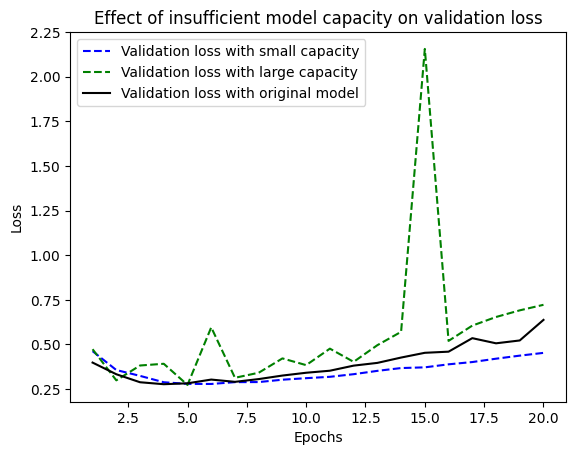

In [47]:
import matplotlib.pyplot as plt
val_loss_small = history_smaller_model.history["val_loss"]
val_loss_large = history_larger_model.history["val_loss"]
val_loss_origin = history_original.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss_small, "b--",
         label="Validation loss with small capacity")

plt.plot(epochs, val_loss_large, "g--",
         label="Validation loss with large capacity")

plt.plot(epochs, val_loss_origin, "black",
         label="Validation loss with original model")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [48]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.6173 - accuracy: 0.7668 - val_loss: 0.5002 - val_accuracy: 0.8337
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4124 - accuracy: 0.8873 - val_loss: 0.3922 - val_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3389 - accuracy: 0.9095 - val_loss: 0.3650 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3020 - accuracy: 0.9215 - val_loss: 0.3725 - val_accuracy: 0.8803
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2820 - accuracy: 0.9295 - val_loss: 0.3594 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2635 - accuracy: 0.9366 - val_loss: 0.3599 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2537 - accuracy: 0.9413 - val_loss: 0.4007 - val_accuracy: 0.8708
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [49]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [11]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_origin = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 70ms/step - loss: 0.5582 - accuracy: 0.7676 - val_loss: 0.4362 - val_accuracy: 0.8535
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3563 - accuracy: 0.8857 - val_loss: 0.3586 - val_accuracy: 0.8585
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2656 - accuracy: 0.9113 - val_loss: 0.3017 - val_accuracy: 0.8823
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2087 - accuracy: 0.9333 - val_loss: 0.2760 - val_accuracy: 0.8913
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1768 - accuracy: 0.9403 - val_loss: 0.3012 - val_accuracy: 0.8779
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1516 - accuracy: 0.9509 - val_loss: 0.2788 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1313 - accuracy: 0.9575 - val_loss: 0.2883 - val_accuracy: 0.8849
Epoch 8/20
30

In [12]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.6504 - accuracy: 0.6147 - val_loss: 0.5708 - val_accuracy: 0.8047
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5661 - accuracy: 0.7374 - val_loss: 0.4867 - val_accuracy: 0.8684
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4986 - accuracy: 0.7937 - val_loss: 0.4166 - val_accuracy: 0.8740
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4281 - accuracy: 0.8401 - val_loss: 0.3469 - val_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3705 - accuracy: 0.8665 - val_loss: 0.3148 - val_accuracy: 0.8833
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3280 - accuracy: 0.8874 - val_loss: 0.3009 - val_accuracy: 0.8802
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2856 - accuracy: 0.9049 - val_loss: 0.2850 - val_accuracy: 0.8899
Epoch 8/20
30

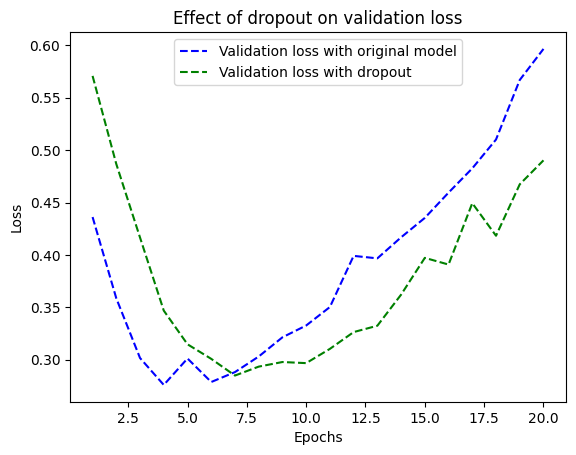

In [13]:
import matplotlib.pyplot as plt
val_loss_dropout = history_dropout.history["val_loss"]
val_loss_origin = history_origin.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss_origin, "b--",
         label="Validation loss with original model")

plt.plot(epochs, val_loss_dropout, "g--",
         label="Validation loss with dropout")

plt.title("Effect of dropout on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Summary